In [100]:
import pandas
import researchpy as rp
import scipy.stats as stats
import statsmodels.api as sm
import os
import yaml
from matplotlib import pyplot as plt
import numpy as np

In [101]:
path_data = os.path.abspath("stats.yaml")
with open(path_data) as file:
    data_normal = yaml.load(file, Loader=yaml.FullLoader)


In [102]:
df = pandas.DataFrame(data_normal)
#print(df.T)
#k = pandas.json_normalize(data).T
#k.index = k.index.str.split('.',expand=True)
#df = k.unstack()[0]

agri_list= ["rosario/sequence01", "rosario/sequence02", "rosario/sequence03", "rosario/sequence04", \
           "rosario/sequence05", "rosario/sequence06", "flourish/DatasetA", "flourish/DatasetB"]
df_agri = df[agri_list]
df_robotics = df[df.columns.difference(agri_list)]
print(df_robotics)

               euroc/MH01  euroc/MH02   euroc/MH03   euroc/MH04   euroc/MH05  \
blur_maximum   794.484209  575.141183   640.309106   253.802319   312.022601   
blur_mean      525.500000  551.000000   634.800000   253.000000   311.600000   
blur_median    459.939411  570.689824   637.855687   253.067687   311.601820   
blur_spread    429.934001   97.724986    13.340439     1.804622     0.998474   
blur_std       167.800000   37.200000     5.100000     0.700000     0.300000   
fasttresh        5.000000    5.000000     5.000000     5.000000    10.000000   
flow_maximum    11.364058    7.918226     0.819967     0.563389     0.056191   
flow_mean        7.700000    5.800000     0.500000     0.400000     0.100000   
flow_median      7.903789    5.450107     0.520280     0.399019     0.054075   
flow_spread      7.604429    3.617563     0.496370     0.427633     0.003448   
flow_std         2.900000    1.300000     0.200000     0.200000     0.000000   
match_mean     856.200000  840.800000  1

In [103]:
#First comparing two groups: agricultural (Rosario, Flourish, Own) and non-agricultural. 
    #- Compare spreads for robustness (Are there large differences in matching performance happen between 
        #some frames in one group compared to the other group)
    #- Compare std to see the average deviation from the mean for each group. 
        #On average, how much does the matching performance deviate from the mean compared to the other group?
    #- Does one group have a frame that is much harder than the frames in the other group? 
        #Compare minimum matching values
    #- Compare medians to see what the typical matching performance is for both groups and if they differ

In [104]:
#Normality checks on spread, std, minimum matches, medians.

#Probability plots of sampling difference of spread:
agri_match_spread = df_agri.loc['match_spread']
robotics_match_spread= df_robotics.loc['match_spread']

agri_match_std = df_agri.loc['match_std']
robotics_match_std= df_robotics.loc['match_std']

agri_match_min = df_agri.loc['match_minimum']
robotics_match_min = df_robotics.loc['match_minimum']


In [128]:
def plot_histogram_and_qq(points, distribution_type="norm"):
    mu = points.mean(axis = 0, skipna = True)
    sigma = points.std(axis = 0, skipna = True)
    plt.figure(figsize=(12,6))
    ax = plt.subplot(1,2,1)
    count, bins, ignored = plt.hist(points, 30, density=True)
    ax.set_title('Histogram')
    ax.set_xlabel('Value bin')
    ax.set_ylabel('Frequency')

    # Overlay the bell curve (normal distribution) on the bins data
    bell_curve = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
    plt.plot(bins, bell_curve, linewidth=2, color='r')

    # Q-Q plot
    plt.subplot(1,2,2)
    res = stats.probplot(points, dist=distribution_type, plot=plt)
    (osm, osr) = res[0]
    (slope, intercept, r) = res[1]
    # For details see: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html
    print("slope, intercept, r:", slope, intercept, r)
    print("r is the square root of the coefficient of determination")

    plt.show()


slope, intercept, r: 52.13764068739068 71.625 0.9430215070513384
r is the square root of the coefficient of determination


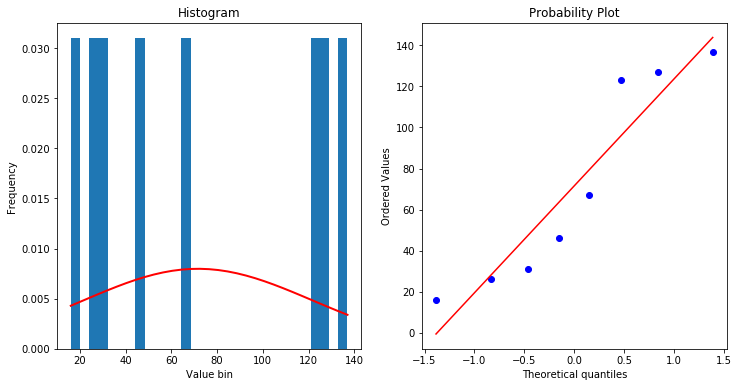

slope, intercept, r: 294.8901319199015 230.8805970149253 0.7808967511692029
r is the square root of the coefficient of determination


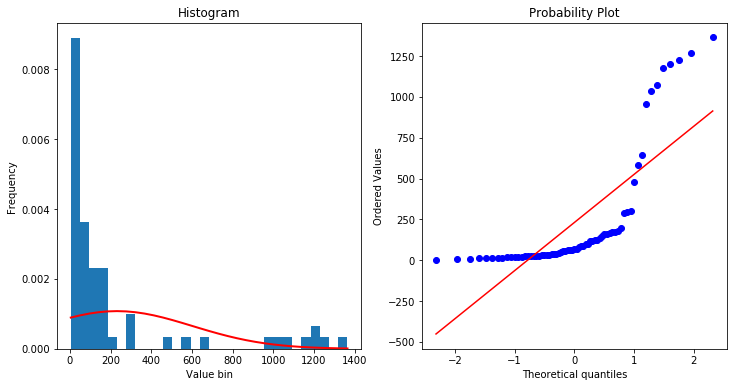

In [136]:
# Run on the initial normally distributed data
plot_histogram_and_qq(agri_match_spread)
plot_histogram_and_qq(robotics_match_spread)


slope, intercept, r: 20.3623401518049 28.474999999999998 0.9470651861873585
r is the square root of the coefficient of determination


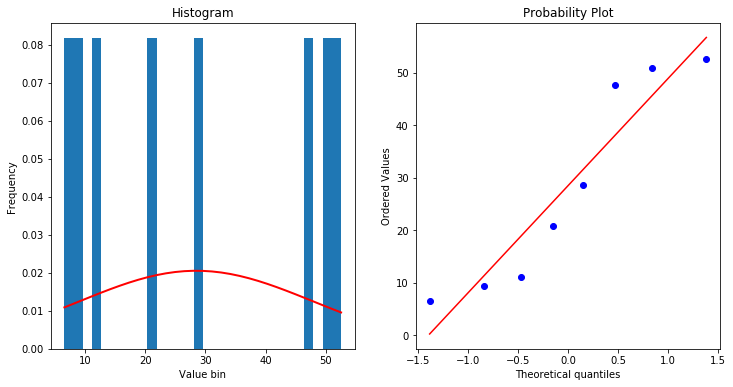

slope, intercept, r: 124.64259104262233 95.94477611940297 0.7739250054753067
r is the square root of the coefficient of determination


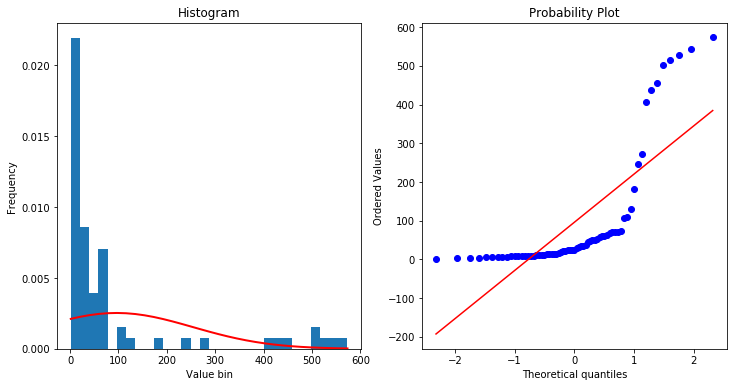

In [135]:
plot_histogram_and_qq(agri_match_std)
plot_histogram_and_qq(robotics_match_std)


slope, intercept, r: 540.4794031123957 1008.25 0.927373481830757
r is the square root of the coefficient of determination


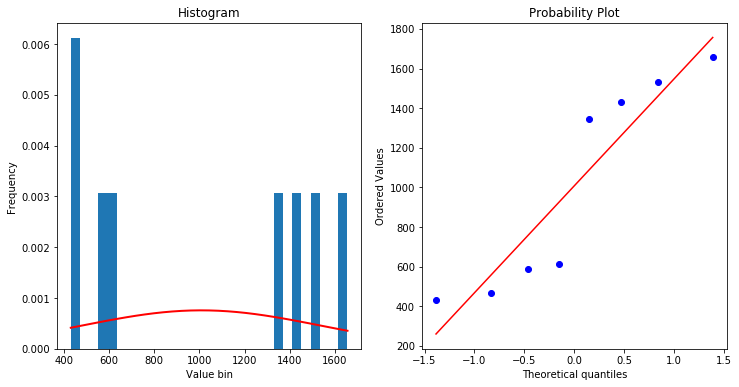

slope, intercept, r: 537.7744094817209 967.8955223880596 0.9084553669749125
r is the square root of the coefficient of determination


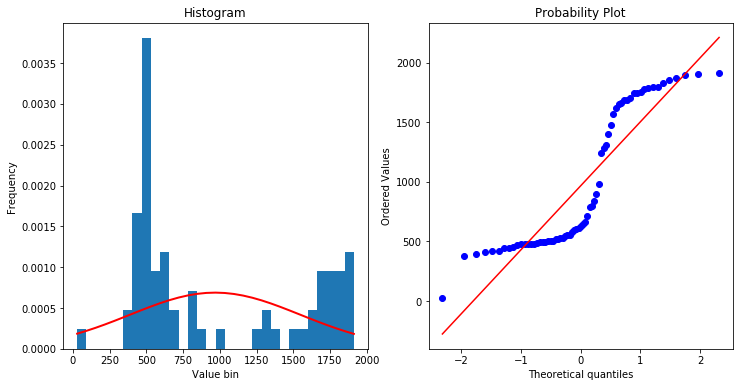

In [137]:
plot_histogram_and_qq(agri_match_min)
plot_histogram_and_qq(robotics_match_min)